In [5]:
# 1.
# Perform Exploratory data analysis. (20)
# What can you conclude from methods of central tendency and deviation of the variables?
# Are there any correlated variables?
# Interpret the skewness of the variables.

import matplotlib.pyplot as mplt

import pandas as pd

data = pd.read_csv("cancer.csv")

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# Output Data

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [7]:
# Summary Statistics

data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


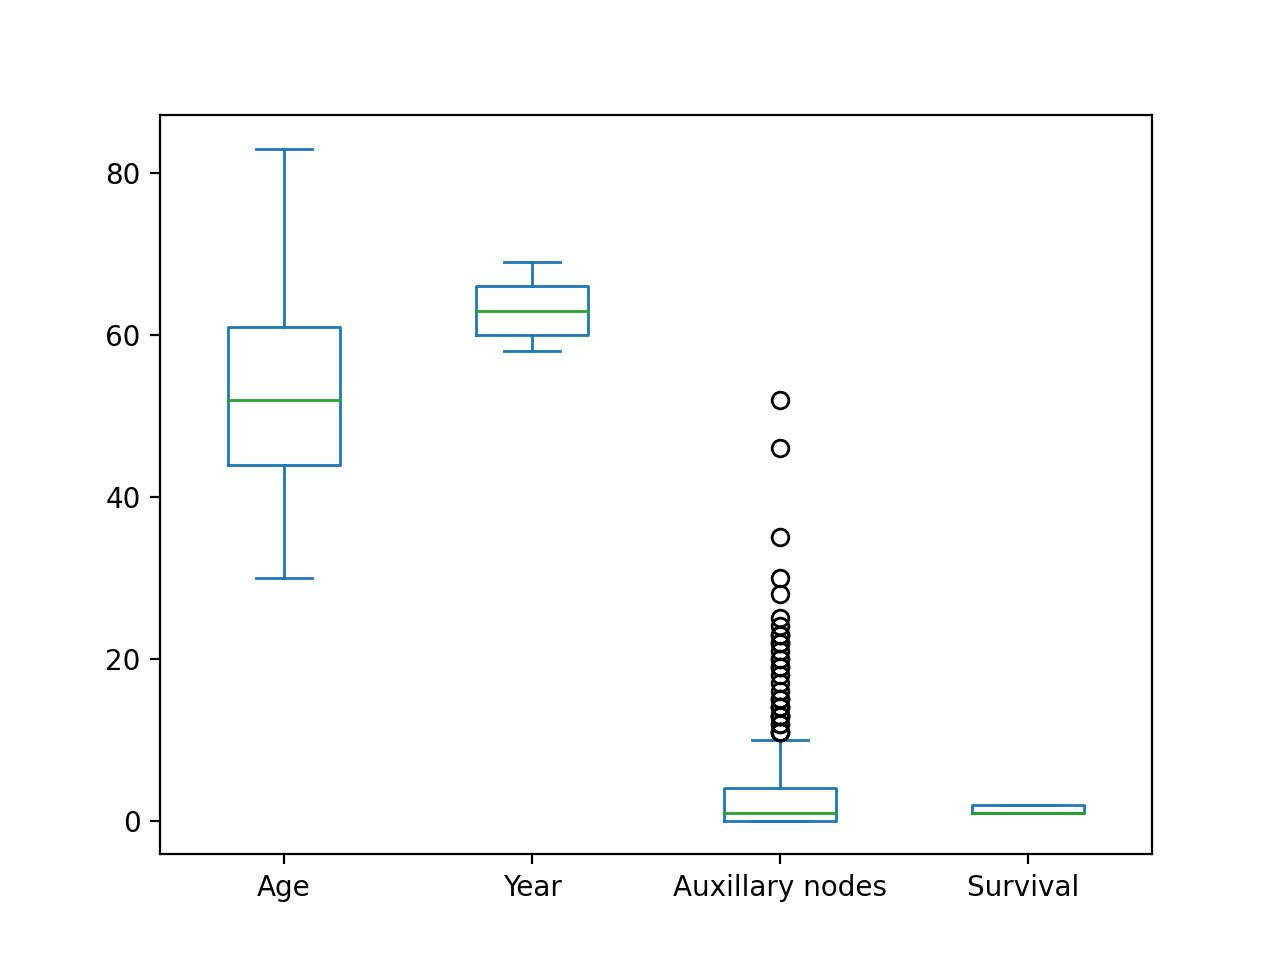

<AxesSubplot:>

In [9]:
# Box Plot

%matplotlib notebook

data.plot.box()

In [11]:
# Correlation

corr = data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


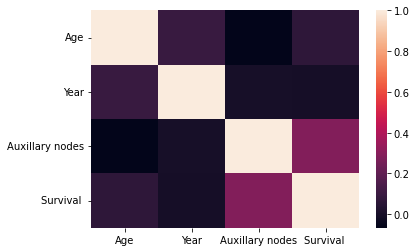

In [12]:
# Correlation Visualization (Heat Map)

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

plt.show()

In [13]:
# Remove Correlated Variables

final_data = data.drop(columns = ["Auxillary nodes"])

final_data

,Age,Year,Survival
0,30,62,1
1,30,65,1
2,31,59,1
3,31,65,1
4,33,58,1
...,...,...,...
300,75,62,1
301,76,67,1
302,77,65,1
303,78,65,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Survival '}>, <AxesSubplot:>]],
      dtype=object)

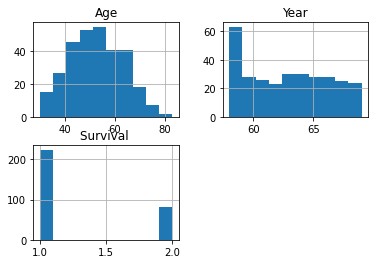

In [14]:
# Skewness

final_data.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Survival '}>, <AxesSubplot:>]],
      dtype=object)

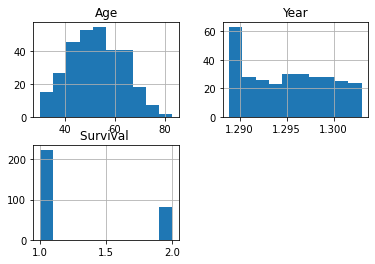

In [18]:
# Attempt to Remove Skewness

import math

final_data["Year"] = final_data["Year"]**0.5

final_data.hist()

In [ ]:
# EDA Conclusions

# Central Tendency Data: 52.531148	62.849180	4.036066	1.265574
# Average age at the time of the cancer operation is 52.5; from the data the most operations occured closer to 
# 1962. Patients typically had 4 positive nodes at the time of the operation and tended to survive longer than five
# years after their surgery.
#
# The most correlation occured between the number of nodes and the length of survival after the surgery; the higher
# the number of cancerous nodes, the higher the Survivability number (approaches 2 which indicates < 5 year survival
# post operation).
#
# Skewness occured in the operation year. This does not count other factors such as non-surgical techniques becoming
# more prevalent for cancer treatments after 1962.

In [19]:
# 2
# Develop Supervised learning models. (50)
# Logistic Regression
# Random Forest
# Support Vector Machine
# Neural Network
# Compare the 4 methods based on the performance metrics and identify the best model for this problem.
# - Use 10 - fold cross validation.
# - Use GridSearchCV for searching through hyper parameters.

# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [34]:
# Import Data

data = pd.read_csv("cancer.csv")

# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [ ]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["Survived > 5 years", "Survived < 5 years"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1
    
# Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


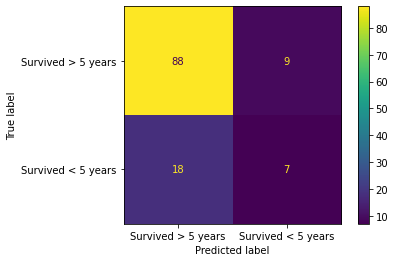

In [49]:
# Random Forest

# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1
    
    # Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

              precision    recall  f1-score   support

           1       0.80      0.97      0.88        97
           2       0.40      0.08      0.13        25

    accuracy                           0.79       122
   macro avg       0.60      0.52      0.51       122
weighted avg       0.72      0.79      0.73       122

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


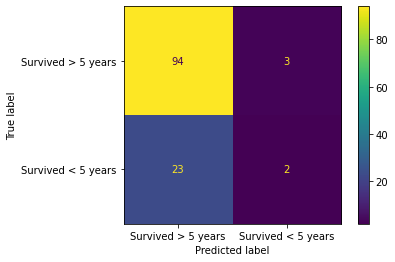

In [50]:
# Support Vector Machine

# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1
    
    # Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


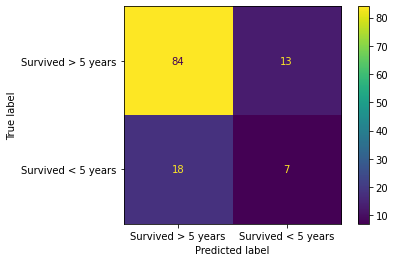

In [51]:
# Neural Network

# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1
    
    # Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

In [46]:
# # Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


In [ ]:
# 3
# Evaluate if the algorithms are overfitting?
#
# Given the amount of data (three inputs and one output), the algorithms are overfitting. Changing parameters only
# changes accuracy figures between 0.75 and 0.79 for all input options on the algorithms. K-fold cross validation
# resulted in slightly higher accuracy figures but it was not over 0.83 accuracy. Overfitting issues could be
# resolved with more inputs into the algorithm.

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122



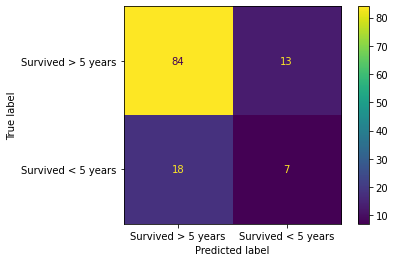

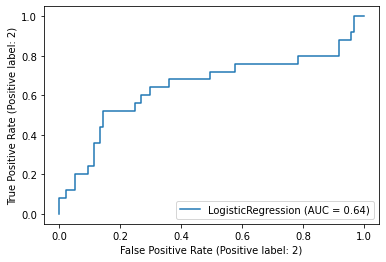

In [47]:
# 4
# Develop a function which can implement machine learning.

def machine_learning (df):
    # Create features/inputs
    X = df.drop(columns = ["Survival "])

    # Create the output/class
    y = df["Survival "]

    # Splitting into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
    
    # Developing and fitting the Neural Network

    nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

    nn_pred = nn.predict(X_test)

    cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
    disp.plot()
    print(classification_report(y_test, nn_pred, labels = clf.classes_))
    # Plotting ROC curve
    plot_roc_curve(clf, X_test, y_test) 
    plt.show()
    
machine_learning(data)    